# <font color = red> **Comprehensive Sales and Customer Data Analysis for Walmart Inc.**

### ***Import important tools***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats

## ***Reading and understanding the data***

In [2]:
walmart = pd.read_excel(r"C:\Users\DeLL\Downloads\XYZ_Retail_Realistic_data.xlsx")
walmart

,Customer_ID,Region,Product_Category,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Date_of_Purchase,Product_Price,Discount_Applied,...,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Return_Reason,Customer_Feedback_Score
0,1132,East,Books,59.87,15.601864,4.9,399,2020-01-01,60.11,9.27,...,Yes,Mobile App,Regular,Warehouse B,4.8,8.67,16,7,Wrong Product,4.7
1,1196,South,Clothing,94.89,96.563203,4.4,161,2020-01-02,68.42,14.37,...,Yes,In-Store,New,Warehouse A,1.2,0.48,6,2,Damaged,2.4
2,1024,West,Books,35.68,28.093451,4.0,204,2020-01-03,7.46,3.38,...,Yes,Online,VIP,Warehouse A,2.2,9.16,72,3,Wrong Product,3.1
3,1471,East,Books,56.13,77.096718,1.0,401,2020-01-04,2.54,2.60,...,No,Mobile App,VIP,Warehouse A,0.1,4.66,33,7,Other,3.3
4,1612,South,Clothing,11.01,22.793516,0.8,28,2020-01-05,0.70,12.29,...,Yes,Online,VIP,Warehouse A,2.8,9.64,96,9,Other,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1079,East,Furniture,22.58,26.164725,4.8,486,2022-09-22,70.35,5.34,...,Yes,In-Store,New,Warehouse A,0.9,2.79,12,5,Wrong Product,2.3
996,1252,South,Clothing,98.55,14.170811,4.4,318,2022-09-23,79.70,3.41,...,No,Online,VIP,Warehouse C,3.5,2.07,22,6,Damaged,1.0
997,1024,West,Books,58.00,64.844189,4.8,227,2022-09-24,57.11,15.08,...,No,In-Store,New,Warehouse A,5.0,3.39,3,11,Wrong Product,4.9
998,1282,North,Groceries,82.66,90.748201,1.9,4,2022-09-25,93.53,8.31,...,No,In-Store,VIP,Warehouse B,1.6,0.63,19,10,Damaged,0.4


## <font color=purple> **Sprint 1:** 
**Data Collection and Cleaning**

### **Data Cleaning**

In [3]:
# Data summary
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer_ID              1000 non-null   int64         
 1   Region                   1000 non-null   object        
 2   Product_Category         1000 non-null   object        
 3   Sales_Amount             1000 non-null   float64       
 4   Quantity_Sold            1000 non-null   float64       
 5   Customer_Satisfaction    1000 non-null   float64       
 6   Stock_Level              1000 non-null   int64         
 7   Date_of_Purchase         1000 non-null   datetime64[ns]
 8   Product_Price            1000 non-null   float64       
 9   Discount_Applied         1000 non-null   float64       
 10  Shipping_Cost            1000 non-null   float64       
 11  Total_Revenue            1000 non-null   float64       
 12  Profit                   1000 non-n

In [4]:
## For stastical distribution
walmart.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer_ID,1000.0,1505.797,1000.0,1261.75,1509.0,1746.25,1999.0,281.632151
Sales_Amount,1000.0,51.15279,0.02,26.495,52.07,75.79,99.95,28.810842
Quantity_Sold,1000.0,50.239424,0.142834,26.110737,49.252862,75.687506,99.834751,28.525665
Customer_Satisfaction,1000.0,2.4681,0.0,1.2,2.5,3.7,5.0,1.431265
Stock_Level,1000.0,252.605,1.0,133.75,248.5,379.5,499.0,142.346611
Date_of_Purchase,1000,2021-05-14 12:00:00,2020-01-01 00:00:00,2020-09-06 18:00:00,2021-05-14 12:00:00,2022-01-19 06:00:00,2022-09-26 00:00:00,NaN
Product_Price,1000.0,50.08623,0.17,26.7825,50.135,73.58,99.92,28.281696
Discount_Applied,1000.0,9.848,0.0,4.6975,10.035,14.92,19.96,5.842033
Shipping_Cost,1000.0,7.37943,0.02,3.4975,7.35,11.2125,14.99,4.364477
Total_Revenue,1000.0,41.30479,-18.59,17.255,41.005,65.4275,98.18,29.387017


In [5]:
# Handling the missing value
walmart.isnull().sum()


Customer_ID                0
Region                     0
Product_Category           0
Sales_Amount               0
Quantity_Sold              0
Customer_Satisfaction      0
Stock_Level                0
Date_of_Purchase           0
Product_Price              0
Discount_Applied           0
Shipping_Cost              0
Total_Revenue              0
Profit                     0
Customer_Age               0
Customer_Gender            0
Payment_Method             0
Order_Status               0
Shipping_Time              0
Product_Returned           0
Loyalty_Points_Earned      0
Promotion_Applied          0
Order_Source               0
Customer_Segment           0
Warehouse_Location         0
Supplier_Rating            0
Product_Weight             0
Product_Dimensions         0
Delivery_Time              0
Return_Reason              0
Customer_Feedback_Score    0
dtype: int64

In [6]:
# Checking for duplicate value
walmart.duplicated().sum()

0

- There is no any duplicate value present in Walmart dataframe.

- Checking the data type and its assigned in correct datatype.

## <font color= white-yellow> **Performing EDA:**
- **Descriptive Statistics**

In [7]:
# Extracting the integer datatype from df
wal = walmart.select_dtypes([int,float])
wal.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Customer_ID,1132.000000,1196.000000,1024.000000,1471.000000,1612.000000,1756.000000,1542.000000,1941.000000,1289.000000,1255.00000,...,1343.000000,1676.00000,1107.000000,1594.000000,1812.000000,1079.000000,1252.000000,1024.000000,1282.000000,1562.000000
Sales_Amount,59.870000,94.890000,35.680000,56.130000,11.010000,48.950000,87.730000,22.430000,37.020000,91.32000,...,83.800000,13.43000,68.740000,47.400000,24.210000,22.580000,98.550000,58.000000,82.660000,99.710000
Quantity_Sold,15.601864,96.563203,28.093451,77.096718,22.793516,98.565045,25.794163,71.217922,1.545662,51.13424,...,48.231858,67.43358,87.450209,89.863575,1.795347,26.164725,14.170811,64.844189,90.748201,35.526181
Customer_Satisfaction,4.900000,4.400000,4.000000,1.000000,0.800000,2.200000,3.100000,4.300000,1.200000,2.40000,...,0.700000,3.10000,3.400000,3.500000,2.700000,4.800000,4.400000,4.800000,1.900000,4.400000
Stock_Level,399.000000,161.000000,204.000000,401.000000,28.000000,181.000000,50.000000,234.000000,13.000000,349.00000,...,321.000000,188.00000,257.000000,154.000000,431.000000,486.000000,318.000000,227.000000,4.000000,128.000000
Product_Price,60.110000,68.420000,7.460000,2.540000,0.700000,23.760000,52.970000,64.960000,96.360000,70.20000,...,99.770000,66.71000,75.100000,66.820000,70.050000,70.350000,79.700000,57.110000,93.530000,24.350000
Discount_Applied,9.270000,14.370000,3.380000,2.600000,12.290000,4.610000,9.590000,1.020000,13.610000,10.83000,...,19.910000,8.88000,11.030000,10.050000,16.060000,5.340000,3.410000,15.080000,8.310000,18.270000
Shipping_Cost,9.660000,8.470000,1.060000,10.960000,10.290000,9.600000,4.020000,14.200000,4.820000,2.28000,...,13.490000,13.85000,0.760000,0.070000,12.250000,4.520000,13.720000,3.250000,12.920000,1.030000
Total_Revenue,50.600000,80.520000,32.300000,53.530000,-1.280000,44.340000,78.140000,21.410000,23.410000,80.49000,...,63.890000,4.55000,57.710000,37.350000,8.150000,17.240000,95.140000,42.920000,74.350000,81.440000
Profit,-19.170000,3.630000,23.780000,40.030000,-12.270000,10.980000,21.150000,-57.750000,-77.770000,8.01000,...,-49.370000,-76.01000,-18.150000,-29.540000,-74.150000,-57.630000,1.720000,-17.440000,-32.100000,56.060000


In [8]:
## for statistical analysis
wal.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,1505.797000,281.632151,1000.000000,1261.750000,1509.000000,1746.250000,1999.000000
Sales_Amount,1000.0,51.152790,28.810842,0.020000,26.495000,52.070000,75.790000,99.950000
Quantity_Sold,1000.0,50.239424,28.525665,0.142834,26.110737,49.252862,75.687506,99.834751
Customer_Satisfaction,1000.0,2.468100,1.431265,0.000000,1.200000,2.500000,3.700000,5.000000
Stock_Level,1000.0,252.605000,142.346611,1.000000,133.750000,248.500000,379.500000,499.000000
Product_Price,1000.0,50.086230,28.281696,0.170000,26.782500,50.135000,73.580000,99.920000
Discount_Applied,1000.0,9.848000,5.842033,0.000000,4.697500,10.035000,14.920000,19.960000
Shipping_Cost,1000.0,7.379430,4.364477,0.020000,3.497500,7.350000,11.212500,14.990000
Total_Revenue,1000.0,41.304790,29.387017,-18.590000,17.255000,41.005000,65.427500,98.180000
Profit,1000.0,-16.160870,40.053608,-120.380000,-45.682500,-15.030000,11.757500,81.020000


In [9]:
# Getting object datatype variables
obj_dtype = walmart.select_dtypes(object)
obj_dtype.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Region,East,South,West,East,South,South,West,West,East,South,...,North,South,South,East,North,East,South,West,North,North
Product_Category,Books,Clothing,Books,Books,Clothing,Furniture,Clothing,Books,Clothing,Books,...,Books,Electronics,Furniture,Electronics,Electronics,Furniture,Clothing,Books,Groceries,Clothing
Customer_Gender,Male,Female,Male,Male,Male,Male,Male,Male,Female,Female,...,Male,Male,Male,Female,Female,Male,Female,Male,Male,Male
Payment_Method,Cash,Cash,PayPal,Credit Card,PayPal,Debit Card,Credit Card,Credit Card,Debit Card,PayPal,...,Credit Card,Debit Card,Cash,Credit Card,PayPal,Credit Card,Cash,Cash,Cash,Debit Card
Order_Status,Completed,Cancelled,Pending,Completed,Completed,Completed,Completed,Cancelled,Completed,Completed,...,Cancelled,Completed,Pending,Pending,Cancelled,Pending,Cancelled,Pending,Pending,Pending
Product_Returned,Yes,No,No,No,No,Yes,No,No,Yes,Yes,...,No,No,No,Yes,No,Yes,Yes,No,No,Yes
Promotion_Applied,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
Order_Source,Mobile App,In-Store,Online,Mobile App,Online,Mobile App,Mobile App,Mobile App,Online,Mobile App,...,Mobile App,Mobile App,Online,In-Store,Online,In-Store,Online,In-Store,In-Store,Online
Customer_Segment,Regular,New,VIP,VIP,VIP,VIP,VIP,New,New,New,...,Regular,Regular,Regular,Regular,VIP,New,VIP,New,VIP,VIP
Warehouse_Location,Warehouse B,Warehouse A,Warehouse A,Warehouse A,Warehouse A,Warehouse B,Warehouse B,Warehouse C,Warehouse A,Warehouse A,...,Warehouse C,Warehouse B,Warehouse C,Warehouse B,Warehouse C,Warehouse A,Warehouse C,Warehouse A,Warehouse B,Warehouse A


In [10]:
## Calculating skewness and kurtosis of numeric data 
print("Skewness :\n", wal.skew())
print("\nkurtosis :\n", wal.kurt())

Skewness :
 Customer_ID               -0.012345
Sales_Amount              -0.085794
Quantity_Sold              0.062732
Customer_Satisfaction      0.011974
Stock_Level                0.021756
Product_Price             -0.002455
Discount_Applied           0.016715
Shipping_Cost              0.068424
Total_Revenue             -0.048351
Profit                     0.008743
Customer_Age              -0.062385
Shipping_Time              0.042688
Loyalty_Points_Earned     -0.060242
Supplier_Rating            0.042765
Product_Weight            -0.008421
Product_Dimensions         0.016098
Delivery_Time              0.042065
Customer_Feedback_Score   -0.013445
dtype: float64

kurtosis :
 Customer_ID               -1.160685
Sales_Amount              -1.197643
Quantity_Sold             -1.179523
Customer_Satisfaction     -1.211767
Stock_Level               -1.177146
Product_Price             -1.138792
Discount_Applied          -1.220189
Shipping_Cost             -1.247986
Total_Revenue           

- In this example, we will calculate the skewness and kurtosis of a numeric column in a DataFrame


### ***Understanding the central tendancy and dispersion of variables-***

In [11]:
print('Mean_For_the _Variables----\n',wal.mean())
print('\nMedian_For_the _Variables----\n',wal.median())
print('\nSD_For_the _Variables----\n',wal.std())
print('\nSkweness_For_the _Variables----\n',wal.skew())
print('\nKurtosis_For_the _Variables----\n',wal.kurt())

Mean_For_the _Variables----
 Customer_ID                1505.797000
Sales_Amount                 51.152790
Quantity_Sold                50.239424
Customer_Satisfaction         2.468100
Stock_Level                 252.605000
Product_Price                50.086230
Discount_Applied              9.848000
Shipping_Cost                 7.379430
Total_Revenue                41.304790
Profit                      -16.160870
Customer_Age                 44.075000
Shipping_Time                 4.980000
Loyalty_Points_Earned        50.245000
Supplier_Rating               2.461000
Product_Weight                5.075440
Product_Dimensions           49.783000
Delivery_Time                 7.431000
Customer_Feedback_Score       2.517200
dtype: float64

Median_For_the _Variables----
 Customer_ID                1509.000000
Sales_Amount                 52.070000
Quantity_Sold                49.252862
Customer_Satisfaction         2.500000
Stock_Level                 248.500000
Product_Price              

- A skewness coefficient close to 0 indicates a symmetric distribution.
- A distribution with a kurtosis less than 3 (platykurtic) has fewer extreme values than a normal distribution.

### **Understanding the relationship between variables-**

In [12]:
#sns.pairplot(wal)

In [13]:
## Describe for object dtype dataframe
obj_dtype.describe().T

,count,unique,top,freq
Region,1000,4,West,268
Product_Category,1000,5,Clothing,238
Customer_Gender,1000,2,Female,504
Payment_Method,1000,4,Credit Card,275
Order_Status,1000,3,Completed,351
Product_Returned,1000,2,Yes,517
Promotion_Applied,1000,2,Yes,516
Order_Source,1000,3,Mobile App,344
Customer_Segment,1000,3,VIP,351
Warehouse_Location,1000,3,Warehouse B,338


##### Some observation of different variables with correlation:

In [14]:
wal[['Profit','Sales_Amount']].corr()

,Profit,Sales_Amount
Profit,1.000000,0.685858
Sales_Amount,0.685858,1.000000


In [15]:
wal[['Profit','Total_Revenue']].corr()

,Profit,Total_Revenue
Profit,1.000000,0.699414
Total_Revenue,0.699414,1.000000


# <font color=green> **Sprint 2: Advanced Data Manipulation with NumPy** 

## <font color=yellow> ***Scenario 1: Sales Performance Matrix***
- **Creation of Pivot Table of Sales Matrix**

In [16]:
sales_matrix = pd.pivot_table(walmart,values='Sales_Amount',index='Region',columns='Product_Category',aggfunc='sum')
sales_matrix

Product_Category,Books,Clothing,Electronics,Furniture,Groceries
Region,,,,,
East,2425.74,3185.93,2627.28,1547.44,1651.19
North,2306.33,2528.63,2609.86,2103.96,2583.96
South,2087.48,3581.15,2512.52,2865.11,2676.40
West,2499.84,2760.91,2703.43,2747.57,3148.06


In [17]:
# Transpose the matrix
transposed_matrix = sales_matrix.T

# Sort each row in descending order
sorted_transposed_matrix = transposed_matrix.apply(lambda x: x.sort_values(ascending=False), axis=1)

# Extract the top-performing region for each product category
top_performing_regions = sorted_transposed_matrix.idxmax(axis=1)

# Extract the sales amount of the top-performing region for each product category
top_sales_values = sorted_transposed_matrix.max(axis=1)

# Combine the results into a DataFrame
top_performance = pd.DataFrame({
    'Top Region': top_performing_regions,
    'Sales Amount': top_sales_values
})

# Display the top-performing regions and their sales amounts
print("Top Performing Regions for Each Product Category:\n", top_performance)

Top Performing Regions for Each Product Category:
                  Top Region  Sales Amount
Product_Category                         
Books                  West       2499.84
Clothing              South       3581.15
Electronics            West       2703.43
Furniture             South       2865.11
Groceries              West       3148.06


In [18]:
# Transpose the matrix
transposed_matrix = sales_matrix.T

# Calculate summary statistics
summary_statistics = sales_matrix.describe()

# Identify top-performing regions for each product category
top_performing_regions = sales_matrix.idxmax()

# Display the results
print("Transposed Sales Matrix:\n", transposed_matrix)
print("\nSummary Statistics:\n", summary_statistics)
print("\nTop-Performing Regions for Each Product Category:\n", top_performing_regions)

Transposed Sales Matrix:
 Region               East    North    South     West
Product_Category                                    
Books             2425.74  2306.33  2087.48  2499.84
Clothing          3185.93  2528.63  3581.15  2760.91
Electronics       2627.28  2609.86  2512.52  2703.43
Furniture         1547.44  2103.96  2865.11  2747.57
Groceries         1651.19  2583.96  2676.40  3148.06

Summary Statistics:
 Product_Category        Books     Clothing  Electronics    Furniture  \
count                4.000000     4.000000      4.00000     4.000000   
mean              2329.847500  3014.155000   2613.27250  2316.020000   
std                180.173897   465.781614     78.50116   611.942233   
min               2087.480000  2528.630000   2512.52000  1547.440000   
25%               2251.617500  2702.840000   2585.52500  1964.830000   
50%               2366.035000  2973.420000   2618.57000  2425.765000   
75%               2444.265000  3284.735000   2646.31750  2776.955000   
max  

##### 2. Implement Advanced Indexing and Slicing: Extract specific data points from the matrix using advanced indexing and slicing techniques.

In [19]:
## Change into numpy array
sub_category = sales_matrix.to_numpy()
sub_category

array([[2425.74, 3185.93, 2627.28, 1547.44, 1651.19],
       [2306.33, 2528.63, 2609.86, 2103.96, 2583.96],
       [2087.48, 3581.15, 2512.52, 2865.11, 2676.4 ],
       [2499.84, 2760.91, 2703.43, 2747.57, 3148.06]])

In [20]:
# 1st method
electronics_data = walmart[walmart['Product_Category'] == 'Electronics']

print("Extracted Data for Electronics:\n", electronics_data)
# Filter data for North and South regions
north_sales = electronics_data[electronics_data['Region'] == 'North']['Sales_Amount'].sum()
south_sales = electronics_data[electronics_data['Region'] == 'South']['Sales_Amount'].sum()

print("\nSales in North region for Electronics:", north_sales)
print("Sales in South region for Electronics:", south_sales)

Extracted Data for Electronics:
      Customer_ID Region Product_Category  Sales_Amount  Quantity_Sold  \
12          1474   West      Electronics         54.56      94.146481   
18          1580   West      Electronics         67.17      61.812824   
19          1538  South      Electronics         62.21      86.236371   
22          1461  South      Electronics         23.72      10.178247   
33          1490   West      Electronics         59.02      36.097390   
..           ...    ...              ...           ...            ...   
987         1442  North      Electronics         70.30      34.669038   
989         1185   West      Electronics         83.03      26.789563   
991         1676  South      Electronics         13.43      67.433580   
993         1594   East      Electronics         47.40      89.863575   
994         1812  North      Electronics         24.21       1.795347   

     Customer_Satisfaction  Stock_Level Date_of_Purchase  Product_Price  \
12             

In [21]:
## Extract perticular data from where data is pivoting by regions and Product_Category
# Change into numpy_array
sales_array = sales_matrix.to_numpy()
# Extracting the data from the array
r = sales_matrix.index.get_loc("North"),sales_matrix.columns.get_loc("Electronics")
North_Electronics = sales_array[r]
print("\nSales for the North, Electronics :",North_Electronics) 
v = sales_matrix.index.get_loc("South"),sales_matrix.columns.get_loc("Electronics")
South_Electronics = sales_array[v]
print("\nSales for the South, Electronics :",South_Electronics) 


Sales for the North, Electronics : 2609.86

Sales for the South, Electronics : 2512.52


In [22]:
# 2nd method
## Using Slicing method
## Change into numpy array
sub_matrix = sales_matrix.to_numpy()
print(sub_matrix)

# Slicing all the categories of the matrix in all region
Books = sub_matrix[:,0]
print("\nMean of the Books category in all region :",Books.mean())
print("\nMedian of the Books category in all region :",np.median(Books))
clothing =sub_matrix[:,1]
print("\nMean of the Clothing category in all region :",clothing.mean())
print("\nMedian of the Clothing category in all region :",np.median(clothing))
Electronics = sub_matrix[:,2]
print("\nMean of the Electronics category in all region :",Electronics.mean())
print("\nMedian of the Electronics category in all region :",np.median(Electronics))
Furniture = sub_matrix[:,3]
print("\nMean of the Furniture category in all region :",Furniture.mean())
print("\nMedian of the Furniture category in all region :",np.median(Furniture))
Groceries = sub_matrix[:,4]
print("\nMean of the Groceries category in all region :",Groceries.mean())
print("\nMedian of the Groceries category in all region :",np.median(Groceries))

## Change in % using slicing of the matrix
change_sales = sub_matrix[1:2,2]
print("\nElecronics for North Region : ",change_sales)
change_sales1 = sub_matrix[2:3,2]
print("\nElecronics for South Region : ",change_sales1)

#Total Percentage change  in sales of Electronics in North and South region
total_change = ((change_sales1 - change_sales)/change_sales1)*100
print("\nTotal change % of elcronics in north and south :", total_change)

[[2425.74 3185.93 2627.28 1547.44 1651.19]
 [2306.33 2528.63 2609.86 2103.96 2583.96]
 [2087.48 3581.15 2512.52 2865.11 2676.4 ]
 [2499.84 2760.91 2703.43 2747.57 3148.06]]

Mean of the Books category in all region : 2329.8475

Median of the Books category in all region : 2366.035

Mean of the Clothing category in all region : 3014.1549999999997

Median of the Clothing category in all region : 2973.42

Mean of the Electronics category in all region : 2613.2725

Median of the Electronics category in all region : 2618.57

Mean of the Furniture category in all region : 2316.02

Median of the Furniture category in all region : 2425.7650000000003

Mean of the Groceries category in all region : 2514.9024999999997

Median of the Groceries category in all region : 2630.1800000000003

Elecronics for North Region :  [2609.86]

Elecronics for South Region :  [2512.52]

Total change % of elcronics in north and south : [-3.87419802]


# <font color=yellow> ***Scenario 2: Inventory Optimization***
- **3. Calculate Stock Turnover Rates:** 

In [23]:
# 1st Method
# Stock Trunover Rates
walmart['Stock_Turnover_Rate'] = walmart['Quantity_Sold'] / walmart['Stock_Level']
mean_turnover_rate = walmart['Stock_Turnover_Rate'].mean()

# Identify high turnover products (below or equal to average)
high_turnover_products = walmart[walmart['Stock_Turnover_Rate'] > mean_turnover_rate]

# Identify low turnover products (below or equal to average)
low_turnover_products = walmart[walmart['Stock_Turnover_Rate'] <= mean_turnover_rate]

print("Stock Turnover Rates:\n", walmart[['Product_Category', 'Stock_Turnover_Rate']])
print("\nHigh Turnover Products (above average):\n", high_turnover_products[['Product_Category', 'Stock_Turnover_Rate']])
print("\nLow Turnover Products (below or equal to average):\n", low_turnover_products[['Product_Category', 'Stock_Turnover_Rate']])

### Task 2: Simulated Turnover Rates for Increased and Decreased Stock Levels
# Simulate increased stock levels by 20%
walmart['Increased_Stock_Level'] = walmart['Stock_Level'] * 1.2
walmart['Turnover_Rate_Increased_Stock'] = walmart['Quantity_Sold'] / walmart['Increased_Stock_Level']

# Simulate decreased stock levels by 20%
walmart['Decreased_Stock_Level'] = walmart['Stock_Level'] * 0.8
walmart['Turnover_Rate_Decreased_Stock'] = walmart['Quantity_Sold'] / walmart['Decreased_Stock_Level']

# Display simulated turnover rates
print("\nSimulated Turnover Rates with Increased Stock Levels:\n", walmart[['Product_Category', 'Turnover_Rate_Increased_Stock']])
print("\nSimulated Turnover Rates with Decreased Stock Levels:\n", walmart[['Product_Category', 'Turnover_Rate_Decreased_Stock']])


Stock Turnover Rates:
     Product_Category  Stock_Turnover_Rate
0              Books             0.039102
1           Clothing             0.599771
2              Books             0.137713
3              Books             0.192261
4           Clothing             0.814054
..               ...                  ...
995        Furniture             0.053837
996         Clothing             0.044562
997            Books             0.285657
998        Groceries            22.687050
999         Clothing             0.277548

[1000 rows x 2 columns]

High Turnover Products (above average):
     Product_Category  Stock_Turnover_Rate
1           Clothing             0.599771
4           Clothing             0.814054
5          Furniture             0.544558
10         Groceries             1.273844
12       Electronics             0.692254
..               ...                  ...
975         Clothing             1.130118
980      Electronics             0.548123
983         Clothing        

In [24]:
import warnings
warnings.filterwarnings('ignore')


In [25]:
# 2nd Method
str=walmart.groupby('Product_Category').apply(lambda x:x['Quantity_Sold'].sum()/x['Stock_Level'].sum())
print("\n Stock Turn Over Ratio of all Categories",str)
avg_str = str.mean()
print("\n Mean Values of Stock Turn Over ratio :",avg_str)
top_performer = str[str>avg_str]
print("\n Top Performer Categories :",top_performer)
low_performer = str[str<=avg_str]
print("\n Low Performer Categories :",low_performer)


 Stock Turn Over Ratio of all Categories Product_Category
Books          0.200249
Clothing       0.204774
Electronics    0.201557
Furniture      0.191770
Groceries      0.194150
dtype: float64

 Mean Values of Stock Turn Over ratio : 0.1984998369972269

 Top Performer Categories : Product_Category
Books          0.200249
Clothing       0.204774
Electronics    0.201557
dtype: float64

 Low Performer Categories : Product_Category
Furniture    0.19177
Groceries    0.19415
dtype: float64


-  <font color=yellow> **4. Simulate Inventory Scenarios:**

In [26]:
# Simulate increased stock levels by 20%
# Stock turn over ratio after 20% increase of stock level
walmart["New_stock_level"] = walmart["Stock_Level"]*1.2
str=walmart.groupby('Product_Category').apply(lambda x:x['Quantity_Sold'].sum()/x['New_stock_level'].sum())
print("\nStock Turn Over Ratio with 20% increase of all Categories",str)
avg_str = str.mean()
print("\nMean Values of Stock Turn Over ratio with 20% increase :",avg_str)
top_performer = str[str>avg_str]
print("\nTop Performer Categories :",top_performer)
low_performer = str[str<=avg_str]
print("\nLow Performer Categories :",low_performer)

# Simulate decreased stock levels by 20%
# Stock turn over ratio after 20% decrease of stock level
walmart["New1_stock_level"] = walmart["Stock_Level"]*0.8
str=walmart.groupby('Product_Category').apply(lambda x:x['Quantity_Sold'].sum()/x['New1_stock_level'].sum())
print("\nStock Turn Over Ratio with 20% decrease of all Categories",str)
avg_str = str.mean()
print("\nMean Values of Stock Turn Over ratio with 20% decrease :",avg_str)
top_performer = str[str>avg_str]
print("\nTop Performer Categories :",top_performer)
low_performer = str[str<=avg_str]
print("\nLow Performer Categories :",low_performer)


Stock Turn Over Ratio with 20% increase of all Categories Product_Category
Books          0.166874
Clothing       0.170645
Electronics    0.167964
Furniture      0.159808
Groceries      0.161792
dtype: float64

Mean Values of Stock Turn Over ratio with 20% increase : 0.1654165308310224

Top Performer Categories : Product_Category
Books          0.166874
Clothing       0.170645
Electronics    0.167964
dtype: float64

Low Performer Categories : Product_Category
Furniture    0.159808
Groceries    0.161792
dtype: float64

Stock Turn Over Ratio with 20% decrease of all Categories Product_Category
Books          0.250311
Clothing       0.255967
Electronics    0.251946
Furniture      0.239712
Groceries      0.242687
dtype: float64

Mean Values of Stock Turn Over ratio with 20% decrease : 0.24812479624653355

Top Performer Categories : Product_Category
Books          0.250311
Clothing       0.255967
Electronics    0.251946
dtype: float64

Low Performer Categories : Product_Category
Furniture 

# <font color=yellow> ***Scenario 3: Sales Trend Analysis***
- 5. Analyze Regional Sales Trends: 

In [27]:
walmart['Year'] = walmart['Date_of_Purchase'].dt.year

In [28]:
# Analyze sales trends across different regions over time.

#walmart.groupby(['Region','Year'])['Sales_Amount'].mean()
pd.pivot_table(walmart, values="Sales_Amount", index="Region", columns="Year",aggfunc="mean")

Year,2020,2021,2022
Region,,,
East,52.670440,46.460000,49.734211
North,45.306234,54.821149,51.662933
South,51.839126,51.296444,53.807857
West,48.798737,56.808962,47.793731


- <font color=yellow> 6. Evaluate Discount Impact on Sales: 

In [29]:
pd.set_option('display.max_columns',None)

In [30]:
walmart.head()

,Customer_ID,Region,Product_Category,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Date_of_Purchase,Product_Price,Discount_Applied,Shipping_Cost,Total_Revenue,Profit,Customer_Age,Customer_Gender,Payment_Method,Order_Status,Shipping_Time,Product_Returned,Loyalty_Points_Earned,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Return_Reason,Customer_Feedback_Score,Stock_Turnover_Rate,Increased_Stock_Level,Turnover_Rate_Increased_Stock,Decreased_Stock_Level,Turnover_Rate_Decreased_Stock,New_stock_level,New1_stock_level,Year
0,1132,East,Books,59.87,15.601864,4.9,399,2020-01-01,60.11,9.27,9.66,50.60,-19.17,52,Male,Cash,Completed,7,Yes,76,Yes,Mobile App,Regular,Warehouse B,4.8,8.67,16,7,Wrong Product,4.7,0.039102,478.8,0.032585,319.2,0.048878,478.8,319.2,2020
1,1196,South,Clothing,94.89,96.563203,4.4,161,2020-01-02,68.42,14.37,8.47,80.52,3.63,67,Female,Cash,Cancelled,9,No,42,Yes,In-Store,New,Warehouse A,1.2,0.48,6,2,Damaged,2.4,0.599771,193.2,0.499810,128.8,0.749714,193.2,128.8,2020
2,1024,West,Books,35.68,28.093451,4.0,204,2020-01-03,7.46,3.38,1.06,32.30,23.78,51,Male,PayPal,Pending,4,No,46,Yes,Online,VIP,Warehouse A,2.2,9.16,72,3,Wrong Product,3.1,0.137713,244.8,0.114761,163.2,0.172141,244.8,163.2,2020
3,1471,East,Books,56.13,77.096718,1.0,401,2020-01-04,2.54,2.60,10.96,53.53,40.03,21,Male,Credit Card,Completed,5,No,82,No,Mobile App,VIP,Warehouse A,0.1,4.66,33,7,Other,3.3,0.192261,481.2,0.160218,320.8,0.240326,481.2,320.8,2020
4,1612,South,Clothing,11.01,22.793516,0.8,28,2020-01-05,0.70,12.29,10.29,-1.28,-12.27,62,Male,PayPal,Completed,6,No,18,Yes,Online,VIP,Warehouse A,2.8,9.64,96,9,Other,0.5,0.814054,33.6,0.678378,22.4,1.017568,33.6,22.4,2020


In [31]:

walmart.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer_ID,1000.0,1505.797,1000.0,1261.75,1509.0,1746.25,1999.0,281.632151
Sales_Amount,1000.0,51.15279,0.02,26.495,52.07,75.79,99.95,28.810842
Quantity_Sold,1000.0,50.239424,0.142834,26.110737,49.252862,75.687506,99.834751,28.525665
Customer_Satisfaction,1000.0,2.4681,0.0,1.2,2.5,3.7,5.0,1.431265
Stock_Level,1000.0,252.605,1.0,133.75,248.5,379.5,499.0,142.346611
Date_of_Purchase,1000,2021-05-14 12:00:00,2020-01-01 00:00:00,2020-09-06 18:00:00,2021-05-14 12:00:00,2022-01-19 06:00:00,2022-09-26 00:00:00,NaN
Product_Price,1000.0,50.08623,0.17,26.7825,50.135,73.58,99.92,28.281696
Discount_Applied,1000.0,9.848,0.0,4.6975,10.035,14.92,19.96,5.842033
Shipping_Cost,1000.0,7.37943,0.02,3.4975,7.35,11.2125,14.99,4.364477
Total_Revenue,1000.0,41.30479,-18.59,17.255,41.005,65.4275,98.18,29.387017


In [32]:
# If there is no discount applied
no_discount_data =walmart[walmart['Discount_Applied']<=5.0]
print("\nTotal Revenue with no any Discount_Applied :",no_discount_data['Total_Revenue'].mean())


Total Revenue with no any Discount_Applied : 50.25181818181818


In [33]:
# If there is some discount applied
discount_applied_data =walmart[walmart['Discount_Applied']>5.0]
print("\nTotal Revenue with Discount_Applied :",discount_applied_data['Total_Revenue'].mean())


Total Revenue with Discount_Applied : 38.095529891304345


In [34]:
discount_impact = no_discount_data['Total_Revenue'].mean() - discount_applied_data['Total_Revenue'].mean()
print("\nDiscount Impact :",discount_impact)
percentage_diff = ((no_discount_data['Total_Revenue'].mean()-discount_applied_data['Total_Revenue'].mean())/discount_applied_data['Total_Revenue'].mean())*100
print("The percentage difference is : {:.2f}%".format(percentage_diff))


Discount Impact : 12.156288290513835
The percentage difference is : 31.91%


- Basically it shows us that the products with no discount are 31% higher sold than discounted products.

### Correlation analysis between discounts and sales volumes, identification of optimal discount levels.¶

In [35]:
corr = walmart[['Sales_Amount','Discount_Applied']].corr()
corr

,Sales_Amount,Discount_Applied
Sales_Amount,1.000000,0.001774
Discount_Applied,0.001774,1.000000


- There are weak relation with sales amount and discount variables

# <font color=green> **Sprint 3: Advanced Data Analysis with Pandas**

## <font color=yellow> ***Scenario 1: Customer Segmentation Analysis***

- 1). Segment Customers Using Pandas: Segment customers based on their purchasing behavior and demographics.

In [36]:
cust_segments= pd.pivot_table(walmart, values = "Customer_ID", index = "Customer_Segment", columns = ["Region","Customer_Gender"], aggfunc = "mean")
cust_segments

Region                   East                     North               \
Customer_Gender        Female         Male       Female         Male   
Customer_Segment                                                       
New               1480.763158  1473.176471  1548.483871  1532.666667   
Regular           1494.714286  1473.000000  1504.600000  1487.512821   
VIP               1528.351351  1503.122449  1500.088889  1465.205882   

Region                  South                      West               
Customer_Gender        Female         Male       Female         Male  
Customer_Segment                                                      
New               1481.465116  1524.733333  1511.105263  1430.860000  
Regular           1493.307692  1494.181818  1561.060000  1567.823529  
VIP               1499.333333  1498.411765  1581.058824  1495.133333

- <font color=yellow> 2). Correlation Analysis Using Pandas: Analyze the correlation between customer satisfaction scores and total spending.

In [37]:
corr = walmart[['Customer_Satisfaction','Sales_Amount']].corr()
corr

,Customer_Satisfaction,Sales_Amount
Customer_Satisfaction,1.000000,0.016816
Sales_Amount,0.016816,1.000000


- we are assuming correlation as -0.7
- Almost no any linear relationship between customer_satisfaction and sales_amount

## <font color=yellow> ***Scenario 2: Product Bundling Strategy***

In [38]:
walmart["Month"] = walmart["Date_of_Purchase"].dt.month
walmart.head()

,Customer_ID,Region,Product_Category,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Date_of_Purchase,Product_Price,Discount_Applied,Shipping_Cost,Total_Revenue,Profit,Customer_Age,Customer_Gender,Payment_Method,Order_Status,Shipping_Time,Product_Returned,Loyalty_Points_Earned,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Return_Reason,Customer_Feedback_Score,Stock_Turnover_Rate,Increased_Stock_Level,Turnover_Rate_Increased_Stock,Decreased_Stock_Level,Turnover_Rate_Decreased_Stock,New_stock_level,New1_stock_level,Year,Month
0,1132,East,Books,59.87,15.601864,4.9,399,2020-01-01,60.11,9.27,9.66,50.60,-19.17,52,Male,Cash,Completed,7,Yes,76,Yes,Mobile App,Regular,Warehouse B,4.8,8.67,16,7,Wrong Product,4.7,0.039102,478.8,0.032585,319.2,0.048878,478.8,319.2,2020,1
1,1196,South,Clothing,94.89,96.563203,4.4,161,2020-01-02,68.42,14.37,8.47,80.52,3.63,67,Female,Cash,Cancelled,9,No,42,Yes,In-Store,New,Warehouse A,1.2,0.48,6,2,Damaged,2.4,0.599771,193.2,0.499810,128.8,0.749714,193.2,128.8,2020,1
2,1024,West,Books,35.68,28.093451,4.0,204,2020-01-03,7.46,3.38,1.06,32.30,23.78,51,Male,PayPal,Pending,4,No,46,Yes,Online,VIP,Warehouse A,2.2,9.16,72,3,Wrong Product,3.1,0.137713,244.8,0.114761,163.2,0.172141,244.8,163.2,2020,1
3,1471,East,Books,56.13,77.096718,1.0,401,2020-01-04,2.54,2.60,10.96,53.53,40.03,21,Male,Credit Card,Completed,5,No,82,No,Mobile App,VIP,Warehouse A,0.1,4.66,33,7,Other,3.3,0.192261,481.2,0.160218,320.8,0.240326,481.2,320.8,2020,1
4,1612,South,Clothing,11.01,22.793516,0.8,28,2020-01-05,0.70,12.29,10.29,-1.28,-12.27,62,Male,PayPal,Completed,6,No,18,Yes,Online,VIP,Warehouse A,2.8,9.64,96,9,Other,0.5,0.814054,33.6,0.678378,22.4,1.017568,33.6,22.4,2020,1


- <font color=yellow> 3). Identify Product Bundles: Identify products frequently purchased together and recommend potential bundles.

In [39]:
prod_bundel = walmart.groupby(["Month","Region"])["Product_Category"].agg(list).reset_index()
prod_bundel

,Month,Region,Product_Category
0,1,East,"[Books, Books, Clothing, Furniture, Groceries,..."
1,1,North,"[Groceries, Clothing, Groceries, Books, Furnit..."
2,1,South,"[Clothing, Clothing, Furniture, Books, Clothin..."
3,1,West,"[Books, Clothing, Books, Groceries, Groceries,..."
4,2,East,"[Books, Groceries, Electronics, Clothing, Groc..."
5,2,North,"[Clothing, Electronics, Books, Groceries, Groc..."
6,2,South,"[Furniture, Clothing, Clothing, Groceries, Gro..."
7,2,West,"[Electronics, Furniture, Books, Books, Furnitu..."
8,3,East,"[Books, Furniture, Clothing, Electronics, Groc..."
9,3,North,"[Clothing, Furniture, Books, Clothing, Electro..."


- <font color=yellow> 4). Optimize Bundling Strategy: Simulate different bundling scenarios using Pandas and recommend the most profitable strategy.

In [40]:
profitable_bundel = walmart.groupby(['Month','Region']).agg({'Product_Category': list,'Profit' : sum}).reset_index()
print(profitable_bundel)

    Month Region                                   Product_Category  Profit
0       1   East  [Books, Books, Clothing, Furniture, Groceries,... -318.45
1       1  North  [Groceries, Clothing, Groceries, Books, Furnit...   38.76
2       1  South  [Clothing, Clothing, Furniture, Books, Clothin... -251.15
3       1   West  [Books, Clothing, Books, Groceries, Groceries,... -382.22
4       2   East  [Books, Groceries, Electronics, Clothing, Groc... -243.99
5       2  North  [Clothing, Electronics, Books, Groceries, Groc... -401.92
6       2  South  [Furniture, Clothing, Clothing, Groceries, Gro... -260.05
7       2   West  [Electronics, Furniture, Books, Books, Furnitu... -683.41
8       3   East  [Books, Furniture, Clothing, Electronics, Groc... -497.04
9       3  North  [Clothing, Furniture, Books, Clothing, Electro... -658.41
10      3  South  [Clothing, Books, Furniture, Groceries, Furnit... -449.64
11      3   West  [Groceries, Clothing, Furniture, Electronics, ... -435.55
12      4   

## <font color=yellow> ***Scenario 3: Sales Channel Analysis***

- <font color=yellow> 5). Analyze Sales by Order Source: Analyze sales performance across different order sources (Online, In-Store, Mobile App).

In [41]:
walmart.head(3)

,Customer_ID,Region,Product_Category,Sales_Amount,Quantity_Sold,Customer_Satisfaction,Stock_Level,Date_of_Purchase,Product_Price,Discount_Applied,Shipping_Cost,Total_Revenue,Profit,Customer_Age,Customer_Gender,Payment_Method,Order_Status,Shipping_Time,Product_Returned,Loyalty_Points_Earned,Promotion_Applied,Order_Source,Customer_Segment,Warehouse_Location,Supplier_Rating,Product_Weight,Product_Dimensions,Delivery_Time,Return_Reason,Customer_Feedback_Score,Stock_Turnover_Rate,Increased_Stock_Level,Turnover_Rate_Increased_Stock,Decreased_Stock_Level,Turnover_Rate_Decreased_Stock,New_stock_level,New1_stock_level,Year,Month
0,1132,East,Books,59.87,15.601864,4.9,399,2020-01-01,60.11,9.27,9.66,50.60,-19.17,52,Male,Cash,Completed,7,Yes,76,Yes,Mobile App,Regular,Warehouse B,4.8,8.67,16,7,Wrong Product,4.7,0.039102,478.8,0.032585,319.2,0.048878,478.8,319.2,2020,1
1,1196,South,Clothing,94.89,96.563203,4.4,161,2020-01-02,68.42,14.37,8.47,80.52,3.63,67,Female,Cash,Cancelled,9,No,42,Yes,In-Store,New,Warehouse A,1.2,0.48,6,2,Damaged,2.4,0.599771,193.2,0.499810,128.8,0.749714,193.2,128.8,2020,1
2,1024,West,Books,35.68,28.093451,4.0,204,2020-01-03,7.46,3.38,1.06,32.30,23.78,51,Male,PayPal,Pending,4,No,46,Yes,Online,VIP,Warehouse A,2.2,9.16,72,3,Wrong Product,3.1,0.137713,244.8,0.114761,163.2,0.172141,244.8,163.2,2020,1


In [42]:
sales_by_source = walmart.groupby(["Order_Source"])['Sales_Amount'].sum()
print(sales_by_source)

Order_Source
In-Store      16118.54
Mobile App    18050.41
Online        16983.84
Name: Sales_Amount, dtype: float64


- <font color=yellow> 6. Evaluate Payment Method Preferences: 
    > Analyze customer payment method preferences and their impact on sales.

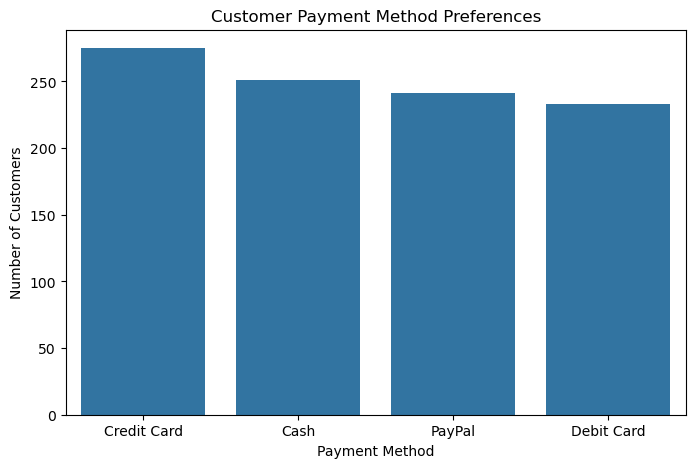

In [43]:
## `payment_method` is the column and 'total_sales' represents sales

payment_counts = walmart['Payment_Method'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.title('Customer Payment Method Preferences')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

- Most of payment mode  is credit card, but some of them are using Cash and Paypal.

In [44]:
# Sales by Payment Method:

sales_by_method = walmart.groupby('Payment_Method')['Sales_Amount'].agg(['sum', 'mean'])
print(sales_by_method)

                     sum       mean
Payment_Method                     
Cash            13139.02  52.346693
Credit Card     14180.15  51.564182
Debit Card      11666.32  50.070043
PayPal          12167.30  50.486722
